In [67]:
from keras.preprocessing.image import ImageDataGenerator
import os
from os import listdir, path
import random
import numpy as np
from skimage.io import imread
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

from PIL import Image
import glob

from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

from sklearn.model_selection import train_test_split

In [68]:
# create data generator
datagen = ImageDataGenerator()

In [69]:
path_P1 = "./romeo/"

In [70]:
def show(image):
    plt.imshow(np.squeeze(image.astype("uint8")), cmap="gray")
    plt.title("image shape: "+ str(image.shape), fontsize=14)
    plt.axis('off');
    
def show_multiple(images, figsize):
    fig, ax = plt.subplots(ncols=len(images), figsize=figsize)
    for col, image in zip(ax, images):
        col.imshow(np.squeeze(image.astype("uint8")), cmap="gray")
        col.set_title("image shape: "+ str(image.shape), fontsize=14)
    plt.tight_layout()
    plt.axis('off');

In [71]:
X, X_train, X_test = [], [], []
image_size = (1080, 1082, 3)

train_files = listdir(path.join(path_P1))
random.shuffle(train_files)

for file in train_files:
    try:
        img = load_img(path.join(path_P1, file), target_size=image_size)
        img = img.resize((541,540)) # we change the size of the image because it's to havy for my PC
        X.append(img_to_array(img))
    except: 
        print(file + " isn't loaded")
        
print("\n==========================================")        
print("Dataset loaded of "+ str(len(X))+ " images")
print("==========================================\n") 
X= np.asarray(X)

X_train, X_test = train_test_split( X, test_size=0.3, random_state=42)
print("Training set: "+ str(X_train.shape))
print("Testing set: "+str(X_test.shape))

datagen1 isn't loaded
.DS_Store isn't loaded

Dataset loaded of 160 images

Training set: (112, 540, 541, 3)
Testing set: (48, 540, 541, 3)


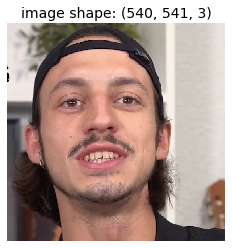

In [72]:
show(X_train[0])

### Generate_rotate_data

In [113]:
shift = 0.2
#datagen = ImageDataGenerator(rotation_range=30, width_shift_range=shift, height_shift_range=shift)
#datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen = ImageDataGenerator(rotation_range=30)

In [114]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [115]:
datagen.fit(X_train)

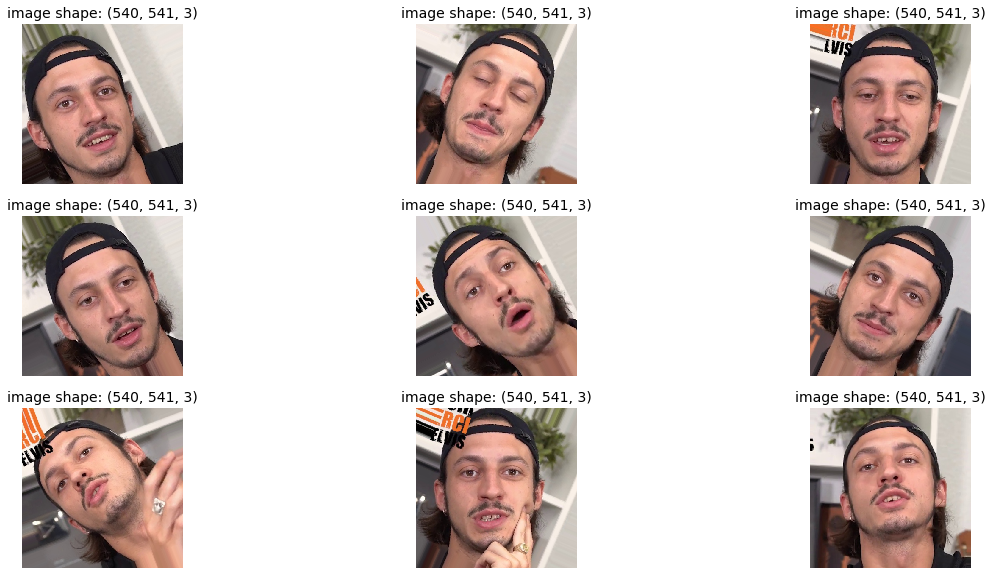

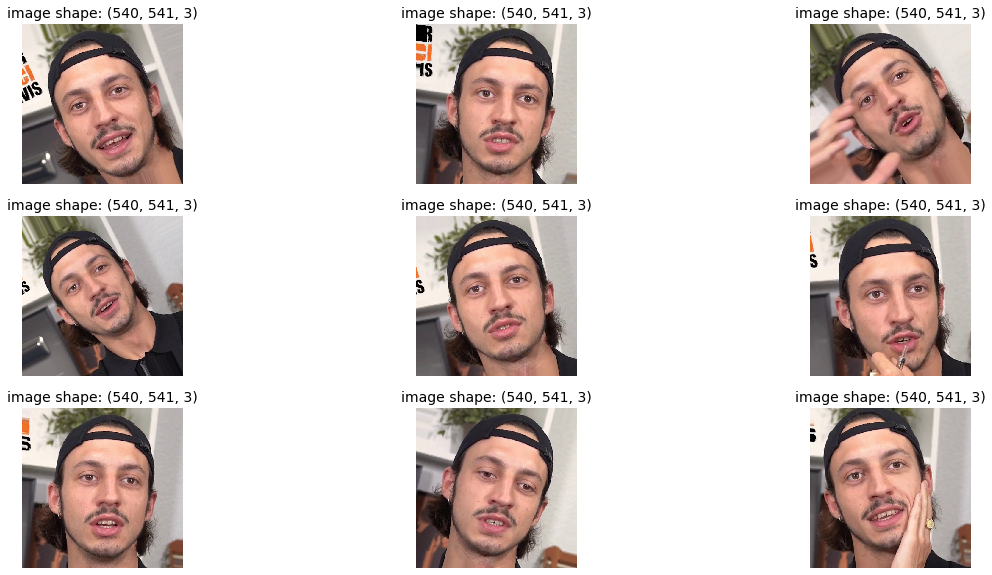

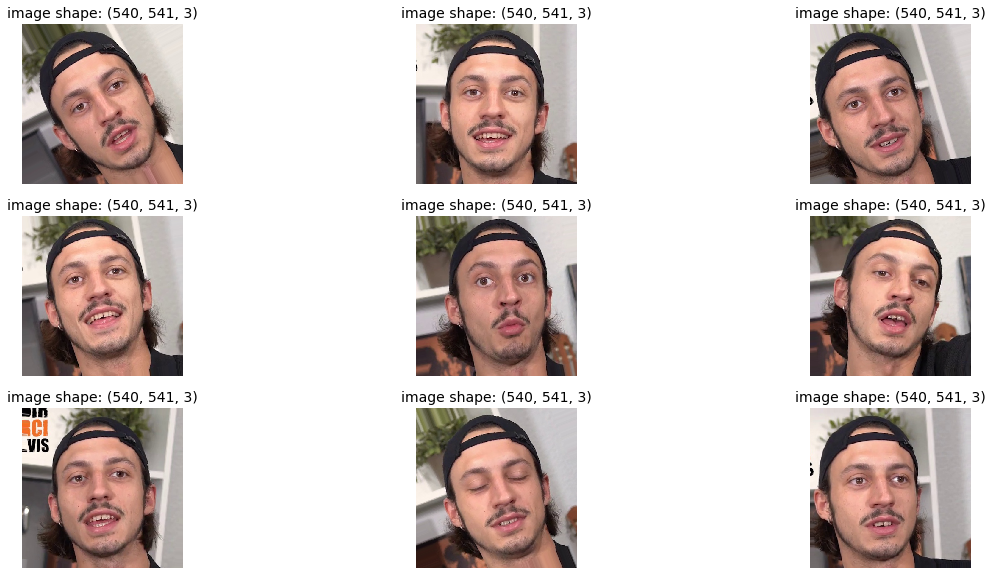

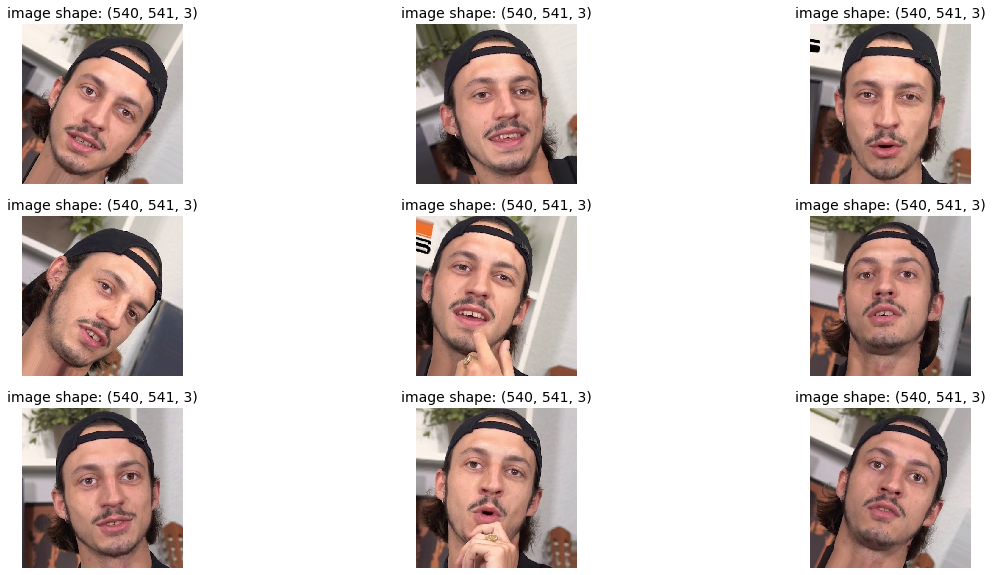

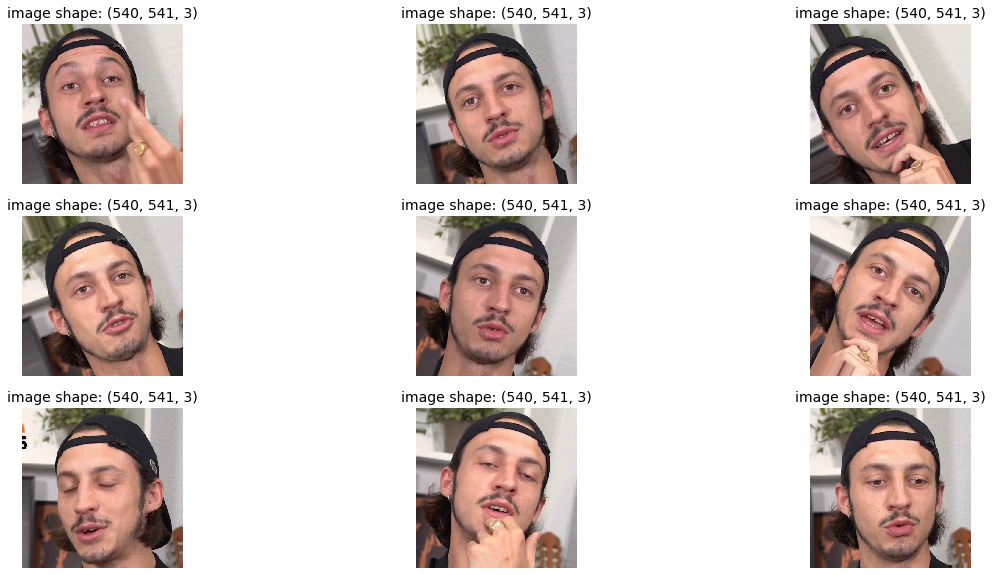

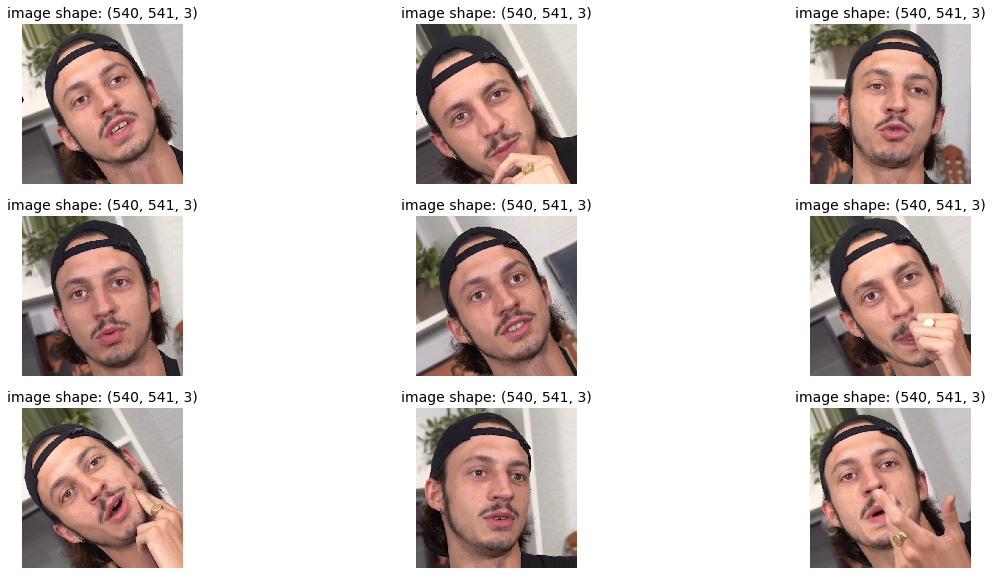

IndexError: index 4 is out of bounds for axis 0 with size 4

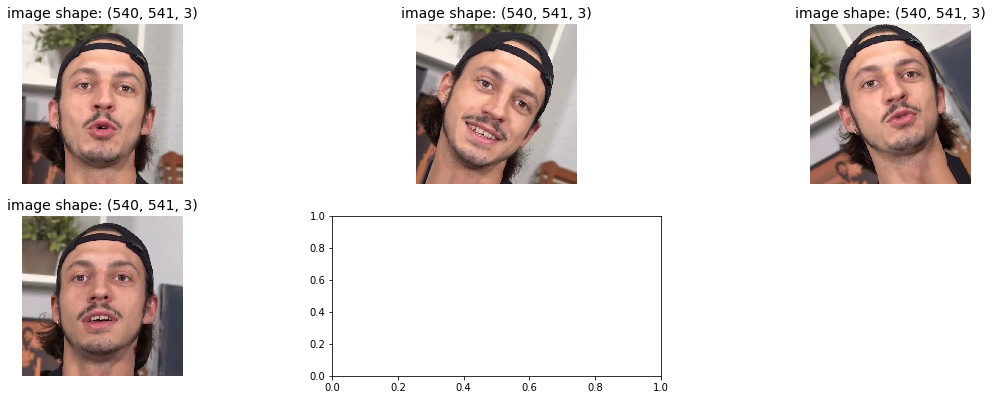

In [116]:
for X_batch in datagen.flow(X_train, batch_size=18, save_to_dir="./romeo/datagen3/", save_prefix='aug_', save_format='png'):
    
    for i in range(0, 9):
        plt.rcParams["figure.figsize"] = (20,10)
        plt.subplot(330 + 1 + i)
        show(X_batch[i])
    # show the plot
    plt.show()


In [138]:
import os
liste_names = os.listdir("./romeo/datagen1/") 
liste_names

['aug1_4',
 'aug1_3',
 'aug1_105',
 'aug1_102',
 'aug1_103',
 'aug1_104',
 'aug1_2',
 'aug1_5',
 'aug1_84',
 'aug1_70',
 'aug1_48',
 'aug1_77',
 'aug1_83',
 'aug1_41',
 '.DS_Store',
 'aug1_79',
 'aug1_46',
 'aug1_12',
 'aug1_15',
 'aug1_23',
 'aug1_24',
 'aug1_78',
 'aug1_47',
 'aug1_40',
 'aug1_49',
 'aug1_82',
 'aug1_76',
 'aug1_71',
 'aug1_85',
 'aug1_25',
 'aug1_22',
 'aug1_14',
 'aug1_13',
 'aug1_31',
 'aug1_36',
 'aug1_38',
 'aug1_53',
 'aug1_98',
 'aug1_54',
 'aug1_96',
 'aug1_62',
 'aug1_65',
 'aug1_91',
 'aug1_39',
 'aug1_37',
 'aug1_30',
 'aug1_90',
 'aug1_64',
 'aug1_63',
 'aug1_97',
 'aug1_55',
 'aug1_52',
 'aug1_99',
 'aug1_110',
 'aug1_111',
 'aug1_0',
 'aug1_108',
 'aug1_7',
 'aug1_101',
 'aug1_9',
 'aug1_106',
 'aug1_8',
 'aug1_107',
 'aug1_100',
 'aug1_109',
 'aug1_6',
 'aug1_1',
 'aug1_16',
 'aug1_29',
 'aug1_11',
 'aug1_27',
 'aug1_18',
 'aug1_20',
 'aug1_74',
 'aug1_80',
 'aug1_87',
 'aug1_73',
 'aug1_45',
 'aug1_89',
 'aug1_42',
 'aug1_21',
 'aug1_26',
 'aug1_19',


In [137]:
for filename in liste_names: 
    try:
        os.rename("./romeo/datagen1/"+filename, "./romeo/datagen1/"+"aug1_"+ str(filename.split('_')[2]))
    except:
        a=10
       